In [63]:
pip install collections2

  Preparing metadata (setup.py) ... done
  Created wheel for collections2: filename=collections2-0.3.0-py3-none-any.whl size=5334 sha256=bb99c1efc642c5ac3fa56d9222271c413e8fa6ff103cf686730e131513c16a48
  Stored in directory: /home/jovyan/.cache/pip/wheels/d0/45/a9/c681e061c5e021c436b342cadba9bd54e7d1b766eb4ac2aeab
Successfully built collections2
Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud as WordCloud
import nltk
import spacy
df = pd.read_csv('jokes.txt', sep=" ;54 ", header=None)

/tmp/ipykernel_7172/652380405.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('jokes.txt', sep=" ;54 ", header=None)


In [41]:
df = df.rename(columns={0 : 'text'})

In [42]:
df

,text
0,"When economic crisis comes, you should know th..."
1,Chuck Norris can sky dive from the ground into...
2,Chuck Norris doesn't have to say NO to drugs.....
3,Chuck Norris was a stowaway on board Apollo 13...
4,Chuck Norris will never suffer from a demonic ...
...,...
410,The reason they changed it from 10 degrees of ...
411,The raisins in Kellogg's Raisin Bran are actua...
412,"Super Mario was based on Chuck Norris, in that..."
413,It isn't what Chuck Norris would do for a Klon...


In [46]:
df['text'] = df['text'].astype(pd.StringDtype())

In [47]:
df.dtypes

text    string[python]
dtype: object

In [59]:
nlp = spacy.load("en_core_web_sm")

In [53]:
textf = df['text'].str.cat(sep = ' ')

In [60]:
doc = nlp(textf)

In [64]:
from collections import Counter

sustantivos = [token.text for token in doc if token.pos_ == "NOUN"]
frecuencia_sustantivos = Counter(sustantivos)

In [65]:
top_25_sustantivos = frecuencia_sustantivos.most_common(25)

In [66]:
sustantivos, frecuencias = zip(*top_25_sustantivos)

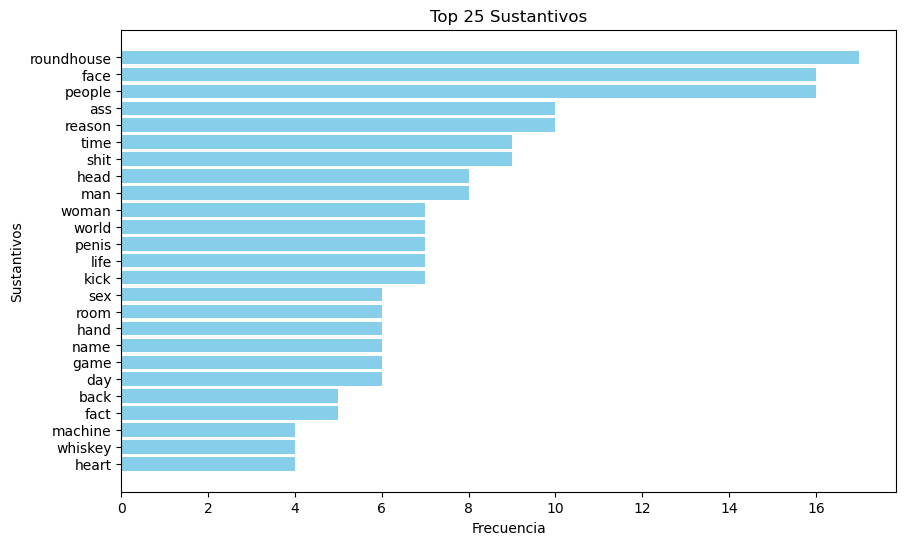

In [67]:
plt.figure(figsize=(10, 6))
plt.barh(sustantivos, frecuencias, color='skyblue')
plt.xlabel('Frecuencia')
plt.ylabel('Sustantivos')
plt.title('Top 25 Sustantivos')
plt.gca().invert_yaxis()
plt.show()